In [1]:
# !pip install tensorflow numpy matplotlib
!pip install numpy pandas matplotlib
!pip install seaborn


In [2]:
# !pip install numpy==1.26.4
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [3]:
# pip install --upgrade opencv-python

training_set = tf.keras.utils.image_dataset_from_directory(
   
    r"C:\Users\abc\Desktop\Final Project\Plant_Disease_Prediction\ricedata\train",

    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
 # 'C:/Users/abc/Desktop/Final Project/RiceLeafsDisease/train',

Found 2168 files belonging to 5 classes.


In [4]:
print(training_set.class_names)


['Bacterial Leaf Blight', 'Brown Spot', 'Healthy', 'Leaf Blast', 'Narrow Brown Spot']


In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
     r"C:\Users\abc\Desktop\Final Project\Plant_Disease_Prediction\ricedata\valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2256 files belonging to 5 classes.


In [6]:
print(validation_set.class_names)


['Bacterial Leaf Blight', 'Brown Spot', 'Healthy', 'Leaf Blast', 'Narrow Brown Spot']


In [7]:
cnn = tf.keras.models.Sequential()

In [8]:

# cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,]))
# cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:

import tensorflow as tf

# Define the CNN model
cnn = tf.keras.models.Sequential()

# First convolutional block
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same',
                               activation='relu', input_shape=(128, 128, 3)))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))

# Second convolutional block
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))


cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))



cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

# Flatten and Dense layers
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=5, activation='softmax'))  # Example: 5 output classes


cnn.add(tf.keras.layers.Dropout(0.25))


cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))




cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting


# cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
#     learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
# Compile the model (adjust optimizer, loss, and metrics as needed)
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Display the model summary
cnn.summary()


C:\Users\abc\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1500)           │         9,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │        57,038 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 38)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,829,915 (22.24 MB)

 Trainable params: 5,829,915 (22.24 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# cnn.add(Dense(5, activation='softmax'))


In [11]:

# # training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

# # cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# # training_history = cnn.fit(x=training_set, validation_data=validation_set, epochs=5)
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
# from tensorflow.keras.optimizers import Adam

# # Update input shape as per your image dimensions
# input_shape = (128, 128, 3)

# cnn = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),  # Ensure the input shape matches your data
#     MaxPooling2D(pool_size=(2, 2)),  # Pooling layer that reduces dimensions
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D(pool_size=(2, 2)),
#     Flatten(),  # Flattening after pooling layers
#     Dense(128, activation='relu'),  # Fully connected layer
#     Dense(5, activation='softmax')  # Output layer for 5 classes
# ])

# # Print model summary to check the output shape after each layer
# cnn.summary()

# # Compile the model with sparse categorical crossentropy (if labels are integers)
# cnn.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Fit the model
# training_history = cnn.fit(
#     x=training_set,  # Ensure this contains both features and labels
#     validation_data=validation_set,  # Ensure this contains both validation features and labels
#     epochs=5
# )


In [12]:
import tensorflow as tf

cnn = tf.keras.models.Sequential([
    
    # 🔹 Convolutional Layer 1
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=2, strides=2),

    # 🔹 Convolutional Layer 2
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2, strides=2),

    # 🔹 Convolutional Layer 3
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2, strides=2),

    # 🔹 Flattening Layer
    tf.keras.layers.Flatten(),

    # 🔹 Fully Connected Dense Layer
    tf.keras.layers.Dense(units=128, activation='relu'),

    # 🔹 Output Layer (10 Classes)
    tf.keras.layers.Dense(units=10, activation='softmax') 
])

# ✅ Compile Model
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 📌 Model Summary
cnn.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,930 (12.61 MB)

 Trainable params: 3,305,930 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
!pip install keras==2.14 tensorflow==2.14



  Using cached keras-2.14.0-py3-none-any.whl.metadata (2.4 kB)


ERROR: Could not find a version that satisfies the requirement tensorflow==2.14 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0)
ERROR: No matching distribution found for tensorflow==2.14


In [15]:
# training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)
cnn = tf.keras.models.Sequential([
    # CNN layers
    tf.keras.layers.Dense(5, activation='softmax')  # Change 38 → 10
])

# cnn.add(Conv2D(512, (3, 3), activation='relu', padding='same'))


In [16]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [17]:
print(f"Training set samples: {len(training_set)}")
print(f"Validation set samples: {len(validation_set)}")


Training set samples: 68
Validation set samples: 71


In [19]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# clase_name=dataset.class_name;
# training_history = cnn.fit(training_set, validation_data=validation_set, epochs=5)


In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the CNN Model
cnn = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')  # 10 classes (change if needed)
])

# Compile the Model
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# Train the Model
training_history = cnn.fit(training_set, validation_data=validation_set, epochs=5)


Epoch 1/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 48s 629ms/step - accuracy: 0.4143 - loss: 352.5583 - val_accuracy: 0.6897 - val_loss: 0.8227
Epoch 2/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 32s 468ms/step - accuracy: 0.6855 - loss: 0.8754 - val_accuracy: 0.8156 - val_loss: 0.4841
Epoch 3/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 32s 468ms/step - accuracy: 0.8099 - loss: 0.5239 - val_accuracy: 0.8732 - val_loss: 0.4346
Epoch 4/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 35s 511ms/step - accuracy: 0.8249 - loss: 0.5134 - val_accuracy: 0.8701 - val_loss: 0.3926
Epoch 5/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 34s 502ms/step - accuracy: 0.8382 - loss: 0.4623 - val_accuracy: 0.9189 - val_loss: 0.2760


In [21]:
#Training set Accuracy

train_loss, train_acc = cnn.evaluate(training_set, verbose=1)
print('Training Accuracy:', train_acc)


# train_loss, train_acc = cnn.evaluate(training_set)
# print('Training accuracy:', train_acc)

68/68 ━━━━━━━━━━━━━━━━━━━━ 11s 163ms/step - accuracy: 0.9019 - loss: 0.3135
Training Accuracy: 0.9220479726791382


In [22]:
cnn.save('trained_plant_disease_model.keras')

In [23]:
training_history.history #Return Dictionary of history

{'accuracy': [0.5189114212989807,
  0.7117158770561218,
  0.8099631071090698,
  0.8081181049346924,
  0.85747230052948],
 'loss': [110.66139221191406,
  0.8134520649909973,
  0.5526016354560852,
  0.552496075630188,
  0.42955681681632996],
 'val_accuracy': [0.6897163391113281,
  0.8156028389930725,
  0.8732269406318665,
  0.870124101638794,
  0.9188829660415649],
 'val_loss': [0.8226573467254639,
  0.4840860068798065,
  0.4345831573009491,
  0.3925778269767761,
  0.27604997158050537]}

In [24]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [25]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


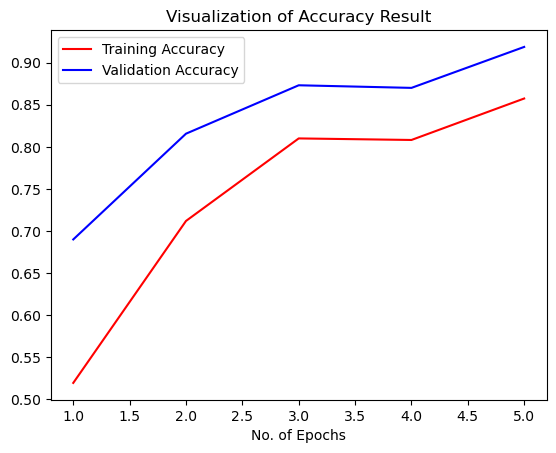

In [26]:
epochs = [i for i in range(1,6)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [27]:
# class_name = validation_set.class_names
class_names = validation_set.class_names
print(class_names)


['Bacterial Leaf Blight', 'Brown Spot', 'Healthy', 'Leaf Blast', 'Narrow Brown Spot']


In [28]:
test_set = tf.keras.utils.image_dataset_from_directory(
     r"C:\Users\abc\Desktop\Final Project\Plant_Disease_Prediction\ricedata\valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2256 files belonging to 5 classes.


In [29]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

2256/2256 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step


In [30]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [31]:
Y_true

<tf.Tensor: shape=(2256,), dtype=int64, numpy=array([0, 0, 0, ..., 4, 4, 4], dtype=int64)>

In [32]:
predicted_categories

<tf.Tensor: shape=(2256,), dtype=int64, numpy=array([0, 0, 0, ..., 4, 4, 4], dtype=int64)>

In [33]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [34]:
# # Precision Recall Fscore
# print(classification_report(Y_true,predicted_categories,target_names=class_name))

# Make sure class_names is defined correctly
class_names =  validation_set.class_names  # or replace with your list of class names

# Now use classification_report
print(classification_report(Y_true, predicted_categories, target_names=class_names))


                       precision    recall  f1-score   support

Bacterial Leaf Blight       0.91      0.91      0.91       438
           Brown Spot       0.88      0.84      0.86       350
              Healthy       0.97      0.95      0.96       768
           Leaf Blast       0.87      0.93      0.90       350
    Narrow Brown Spot       0.91      0.91      0.91       350

             accuracy                           0.92      2256
            macro avg       0.91      0.91      0.91      2256
         weighted avg       0.92      0.92      0.92      2256



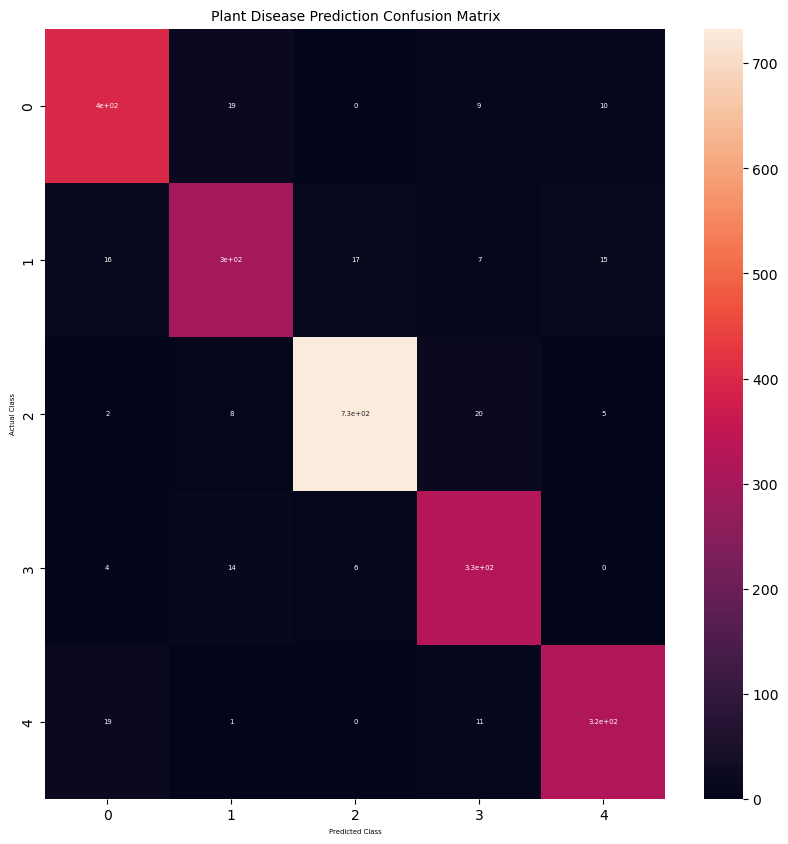

In [35]:
plt.figure(figsize=(10, 10))
sns.heatmap(cm,annot=True,annot_kws={"size": 5})

plt.xlabel('Predicted Class',fontsize = 5)
plt.ylabel('Actual Class',fontsize = 5)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 10)
plt.show()